<a href="https://colab.research.google.com/github/king-roman101/Blob-Stone-CPF2/blob/main/blob_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blob detection

Blob detection is a computer vision technique used to identify and locate regions of an image that share common properties, such as color or intensity.

"BLOB" stands for Binary Large Object


## Import denpendencies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Upload your image
1. Click folder icon on the left side of colab screen
2. Click upload icon then choose your image or drag your image to empty space in the lelf side

In [ ]:
# Load input image
image = cv2.imread("Size3.5_83.jpg")
original_image = image.copy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pre-processing image

In [ ]:
# Convert image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert pixel values to floating point for calculations
image_float = image.astype(float)

# Calculate mean and standard deviation
mean = np.mean(image_float)
std_dev = np.std(image_float)

# Perform standardization (z-score normalization)
standardized_image = (image_float - mean) / std_dev

# Scale pixel values back to [0, 255] range
standardized_image = np.clip(standardized_image * 127.5 + 127.5, 0, 255).astype(np.uint8)

# Define the kernel for erosion
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply erosion
eroded_image = cv2.erode(image, kernel, iterations=1)

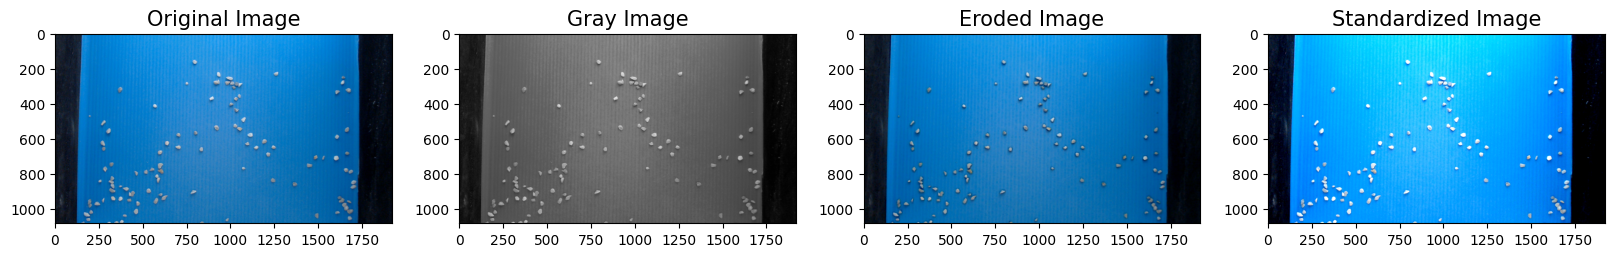

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
ax[3].imshow(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontsize=15)
ax[1].set_title('Gray Image',fontsize=15)
ax[2].set_title('Eroded Image',fontsize=15)
ax[3].set_title('Standardized Image',fontsize=15)
plt.show()

## Set up blob detection parameters
1. Area
2. Thresholds (Intensity)
3. Circularity
4. Inertia
5. Convexity (Area of the Blob / Area of it’s convex hull)
6. Distance Between Blobs

In [ ]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Define color (dark or light blob)
params.filterByColor = True
params.blobColor = 255

# Define thresholds
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 100
params.maxArea = 500

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.7
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = False
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 0.000001

# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

## Run Blob detection

In [ ]:
# Detect blobs
keypoints = detector.detect(standardized_image)
print("Number of blobs detected are : ", len(keypoints))

suma =0
for i, keypoint in enumerate(keypoints):
    suma += keypoint.size
    print(f"Blob {i + 1} - Area: {keypoint.size:.2f}")
print(suma)


Number of blobs detected are :  268
Blob 1 - Area: 21.14
Blob 2 - Area: 15.95
Blob 3 - Area: 17.62
Blob 4 - Area: 17.32
Blob 5 - Area: 15.02
Blob 6 - Area: 15.09
Blob 7 - Area: 19.06
Blob 8 - Area: 20.30
Blob 9 - Area: 21.30
Blob 10 - Area: 18.13
Blob 11 - Area: 20.24
Blob 12 - Area: 18.34
Blob 13 - Area: 20.39
Blob 14 - Area: 12.19
Blob 15 - Area: 21.70
Blob 16 - Area: 17.92
Blob 17 - Area: 15.60
Blob 18 - Area: 15.95
Blob 19 - Area: 20.27
Blob 20 - Area: 15.94
Blob 21 - Area: 17.04
Blob 22 - Area: 17.78
Blob 23 - Area: 18.69
Blob 24 - Area: 20.34
Blob 25 - Area: 14.35
Blob 26 - Area: 12.18
Blob 27 - Area: 17.38
Blob 28 - Area: 17.41
Blob 29 - Area: 20.10
Blob 30 - Area: 17.57
Blob 31 - Area: 15.57
Blob 32 - Area: 17.44
Blob 33 - Area: 16.62
Blob 34 - Area: 18.00
Blob 35 - Area: 19.11
Blob 36 - Area: 19.77
Blob 37 - Area: 18.43
Blob 38 - Area: 20.08
Blob 39 - Area: 22.66
Blob 40 - Area: 17.53
Blob 41 - Area: 18.11
Blob 42 - Area: 19.78
Blob 43 - Area: 20.47
Blob 44 - Area: 14.18
Blob 

## Show image with blob result

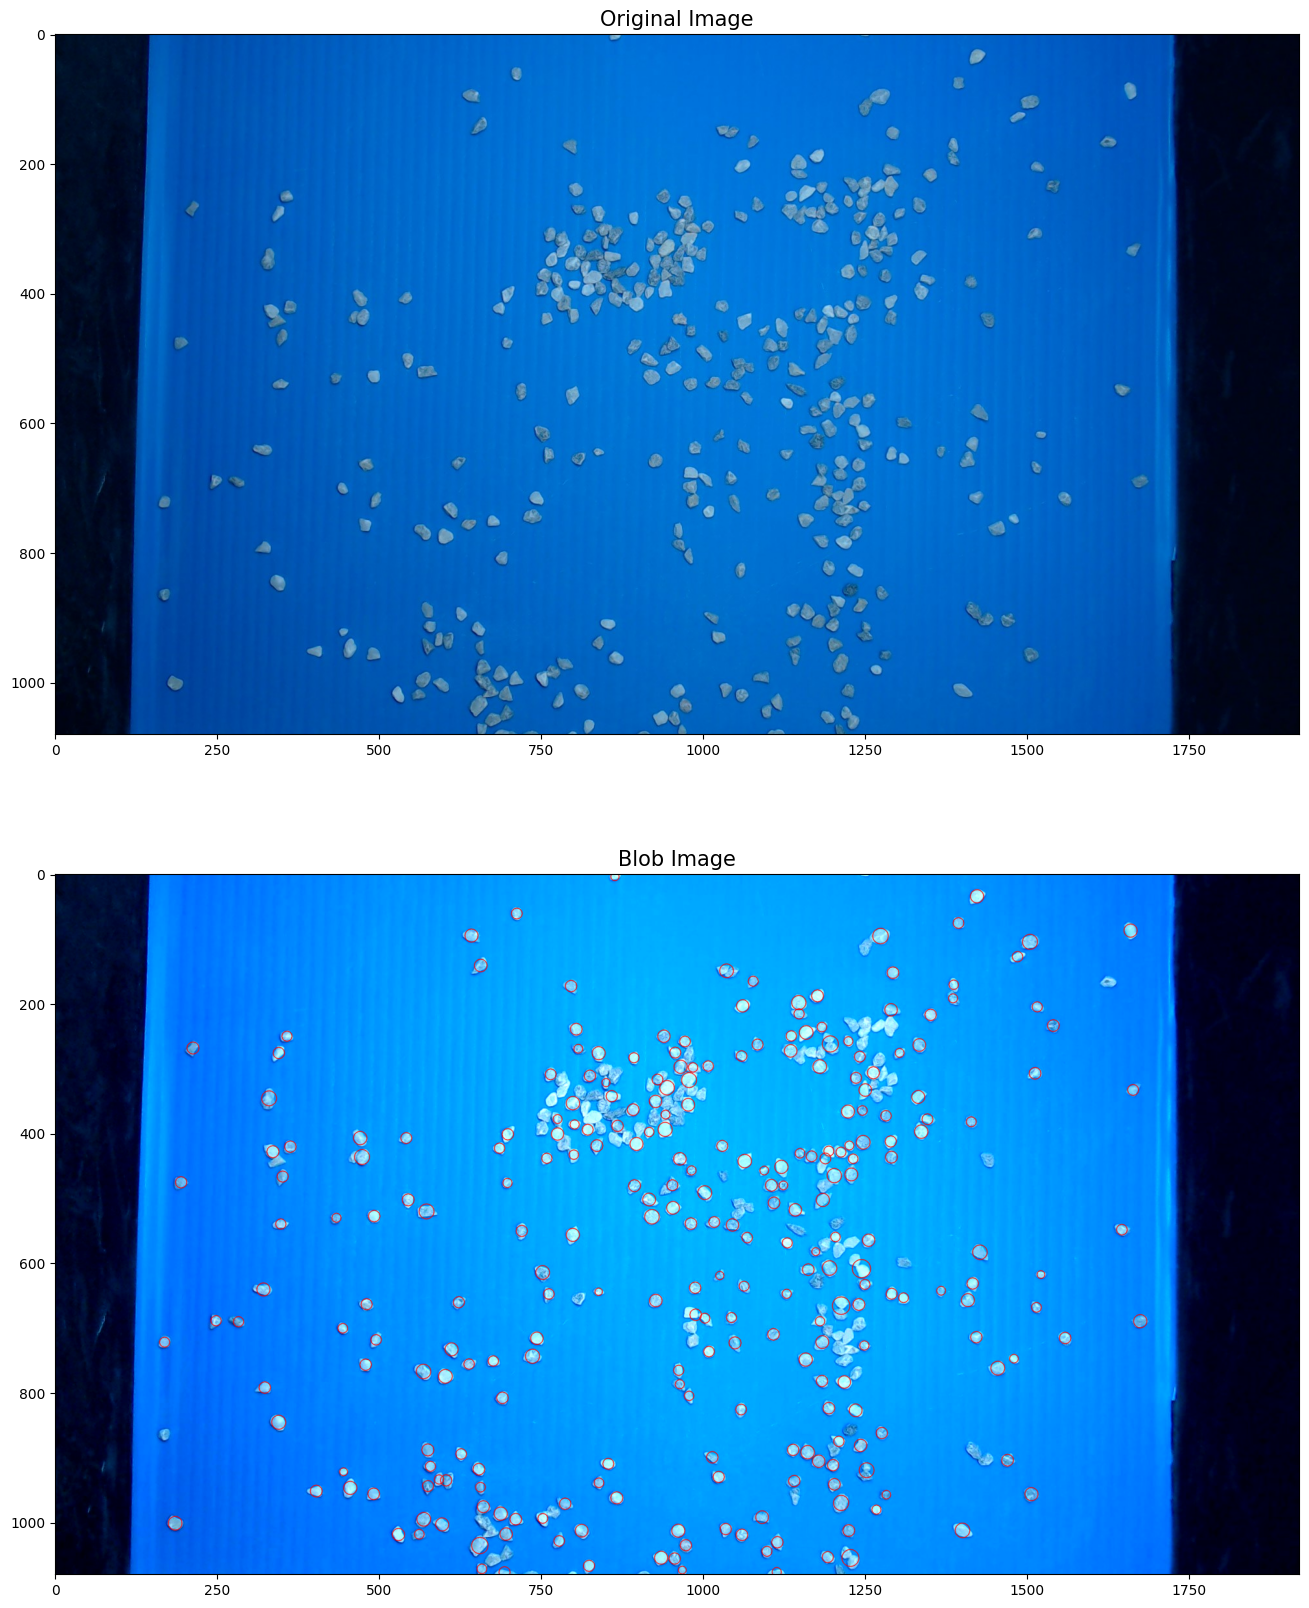

In [ ]:
# Draw blobs
img_with_blobs = cv2.drawKeypoints(standardized_image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig, ax = plt.subplots(2,1,figsize=(40,20))
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_with_blobs, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontsize=15)
ax[1].set_title('Blob Image',fontsize=15)
plt.show()